# Prediction football results   

<br>
<br>
<center>
    <img src="https://sport-bet2010.com/wp-content/uploads/2018/02/web-features-6.jpg" width="450" alt="soccer.logo"  />
</center>
<br>

<div style="text-align: right"> <b>By David Clavijo</b> </div>  
  
    
    

# About this Notebook

In this notebook, I show you, prediction models, for the football match results.   This notebook uses many insights got from the analysis done on other notebooks from this project (you can see my Github repository). This project aims to find out one model that predicts the results of soccer matches better than bookmakers. The notebook consists of three steps:  

1. Data preparation.

2. Construct models and compare themselves.

3. Compare models with predictions of the bookmakers.

  
  
# About Database

Database collected for forecasting the results of soccer matches (**Credits:https://www.football-data.co.uk/**).
The database consists of data of the five main leagues of world soccer by country **English Premier League (England), La Liga (Spain), Serie A (Italy), Bundesliga (Germany), and League 1 (France)**.
In the database, the data are recorded in a table for the season by each league. Example: EPL_2001, EPL, 2002, EPL_2003, etc.
The table is called using the following description:

*   EPL: English Premier League (England)
*   LALIGA: La Liga (Spain)
*   SA: Serie A (Italy)
*   BUNDESLIGA: Bundesliga (Germany)
*   L1: League 1 (France)

After each code by the league is used, the next character is "underscore",  and then continue the year of begin of the season like 2001, 2010, 2020, etc.

Further to the tables by each league and year, in the Database, I created  5 tables with records of the attendance in matches by each league, because the other tables don't exist the records of attendance. The tables are called:

*   attendance_epl
*   attendance_laliga
*   attendance_sa
*   attendance_bundesliga
*   attendance_l1

you can see how I get the data from the web site of ESPN using web-scraping in my GitHub repository. The notebook is called **Web Scraping in ESPN**.

Another important variable is the market value of the teams, so this variable is a good predictor. Then in the database we have another five tables with the market value by each team by year. The tables are called:

*   market_epl
*   market_laliga
*   market_seriea
*   market_bundesliga
*   market_ligue1
  
you can see how I get the data from transfermarkt web site using web-scraping in my GitHub repository. The notebook is called **Web Scraping in transfermarkt**.

## Headers code
the next code shows the abbreviations to headers of the tables:  
  
**Basic information matches soccer**  
Div = League Division  
Date = Match Date (dd/mm/yy)  
Time = Time of match kick off  
HomeTeam = Home Team  
AwayTeam = Away Team  
FTHG and HG = Full Time Home Team Goals  
FTAG and AG = Full Time Away Team Goals  
FTR and Res = Full Time Result (H=Home Win, D=Draw, A=Away Win)  
HTHG = Half Time Home Team Goals  
HTAG = Half Time Away Team Goals  
HTR = Half Time Result (H=Home Win, D=Draw, A=Away Win)  
Attendance = Crowd Attendance  
Referee = Match Referee  

**Match Stats**  
HS = Home Team Shots  
AS = Away Team Shots  
HST = Home Team Shots on Target  
AST = Away Team Shots on Target  
HHW = Home Team Hit Woodwork  
AHW = Away Team Hit Woodwork  
HC = Home Team Corners  
AC = Away Team Corners  
HF = Home Team Fouls Committed  
AF = Away Team Fouls Committed  
HFKC = Home Team Free Kicks Conceded  
AFKC = Away Team Free Kicks Conceded  
HO = Home Team Offsides  
AO = Away Team Offsides  
HY = Home Team Yellow Cards  
AY = Away Team Yellow Cards  
HR = Home Team Red Cards  
AR = Away Team Red Cards  
HBP = Home Team Bookings Points (10 = yellow, 25 = red)  
ABP = Away Team Bookings Points (10 = yellow, 25 = red)  
  
Note that Free Kicks Conceeded includes fouls, offsides and any other offense commmitted and will always be equal to or higher than the number of fouls. Fouls make up the vast majority of Free Kicks Conceded. Free Kicks Conceded are shown when specific data on Fouls are not available (France 2nd, Belgium 1st and Greece 1st divisions).  
  
Note also that English and Scottish yellow cards do not include the initial yellow card when a second is shown to a player converting it into a red, but this is included as a yellow (plus red) for European games.  
  
**Key to 1X2 (match) betting odds data:** 
  
B365H = Bet365 home win odds  
B365D = Bet365 draw odds  
B365A = Bet365 away win odds  
BSH = Blue Square home win odds  
BSD = Blue Square draw odds  
BSA = Blue Square away win odds  
BWH = Bet&Win home win odds  
BWD = Bet&Win draw odds  
BWA = Bet&Win away win odds  
GBH = Gamebookers home win odds  
GBD = Gamebookers draw odds  
GBA = Gamebookers away win odds  
IWH = Interwetten home win odds  
IWD = Interwetten draw odds  
IWA = Interwetten away win odds  
LBH = Ladbrokes home win odds  
LBD = Ladbrokes draw odds  
LBA = Ladbrokes away win odds  
PSH and PH = Pinnacle home win odds  
PSD and PD = Pinnacle draw odds  
PSA and PA = Pinnacle away win odds  
SOH = Sporting Odds home win odds  
SOD = Sporting Odds draw odds  
SOA = Sporting Odds away win odds  
SBH = Sportingbet home win odds  
SBD = Sportingbet draw odds  
SBA = Sportingbet away win odds  
SJH = Stan James home win odds  
SJD = Stan James draw odds  
SJA = Stan James away win odds  
SYH = Stanleybet home win odds  
SYD = Stanleybet draw odds  
SYA = Stanleybet away win odds  
VCH = VC Bet home win odds  
VCD = VC Bet draw odds  
VCA = VC Bet away win odds  
WHH = William Hill home win odds  
WHD = William Hill draw odds  
WHA = William Hill away win odds  
  
Bb1X2 = Number of BetBrain bookmakers used to calculate match odds averages and maximums  
BbMxH = Betbrain maximum home win odds  
BbAvH = Betbrain average home win odds  
BbMxD = Betbrain maximum draw odds  
BbAvD = Betbrain average draw win odds  
BbMxA = Betbrain maximum away win odds  
BbAvA = Betbrain average away win odds  
  
MaxH = Market maximum home win odds  
MaxD = Market maximum draw win odds  
MaxA = Market maximum away win odds  
AvgH = Market average home win odds  
AvgD = Market average draw win odds  
AvgA = Market average away win odds  
  
**Key to total goals betting odds:**
  
BbOU = Number of BetBrain bookmakers used to calculate over/under 2.5 goals (total goals) averages and maximums  
BbMx>2.5 = Betbrain maximum over 2.5 goals  
BbAv>2.5 = Betbrain average over 2.5 goals  
BbMx<2.5 = Betbrain maximum under 2.5 goals  
BbAv<2.5 = Betbrain average under 2.5 goals  
  
GB>2.5 = Gamebookers over 2.5 goals  
GB<2.5 = Gamebookers under 2.5 goals  
B365>2.5 = Bet365 over 2.5 goals  
B365<2.5 = Bet365 under 2.5 goals  
P>2.5 = Pinnacle over 2.5 goals  
P<2.5 = Pinnacle under 2.5 goals  
Max>2.5 = Market maximum over 2.5 goals  
Max<2.5 = Market maximum under 2.5 goals  
Avg>2.5 = Market average over 2.5 goals  
Avg<2.5 = Market average under 2.5 goals  
  
**Key to Asian handicap betting odds:**
  
BbAH = Number of BetBrain bookmakers used to Asian handicap averages and maximums  
BbAHh = Betbrain size of handicap (home team)  
AHh = Market size of handicap (home team) (since 2019/2020)  
BbMxAHH = Betbrain maximum Asian handicap home team odds  
BbAvAHH = Betbrain average Asian handicap home team odds  
BbMxAHA = Betbrain maximum Asian handicap away team odds  
BbAvAHA = Betbrain average Asian handicap away team odds  
  
GBAHH = Gamebookers Asian handicap home team odds  
GBAHA = Gamebookers Asian handicap away team odds  
GBAH = Gamebookers size of handicap (home team)  
LBAHH = Ladbrokes Asian handicap home team odds  
LBAHA = Ladbrokes Asian handicap away team odds  
LBAH = Ladbrokes size of handicap (home team)  
B365AHH = Bet365 Asian handicap home team odds  
B365AHA = Bet365 Asian handicap away team odds  
B365AH = Bet365 size of handicap (home team)  
PAHH = Pinnacle Asian handicap home team odds  
PAHA = Pinnacle Asian handicap away team odds  
MaxAHH = Market maximum Asian handicap home team odds  
MaxAHA = Market maximum Asian handicap away team odds  
AvgAHH = Market average Asian handicap home team odds  
AvgAHA = Market average Asian handicap away team odds  
  
Closing odds (last odds before match starts)  

As above but with an additional "C" character following the bookmaker abbreviation/Max/Avg.Football-Data would like to acknowledge the following sources which have been utilised in the compilation of Football-Data's results and odds files.Current results (full time, half time). XScores - http://www.xscores .com  

Match statistics BBC, ESPN Soccer, Bundesliga.de, Gazzetta.it and Football.fr  

Bookmakers betting odds. Individual bookmakers. Betting odds for weekend games are collected Friday afternoons, and on Tuesday afternoons for midweek games. 

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png) 

# 1. Connect to Database.

The source of the data is a Database of Db2 (IBM Database). To connect with the database we can use the library **sqlalchemy** that helps to load the data and edit them like a dataframe of pandas:

In [1]:
!pip install sqlalchemy==1.3.9 #install libraries if you don't have them.
from sqlalchemy import create_engine

     |████████████████████████████████| 6.0 MB 10.5 MB/s eta 0:00:01
  Created wheel for sqlalchemy: filename=SQLAlchemy-1.3.9-cp38-cp38-linux_x86_64.whl size=1209504 sha256=1a2b929fe1e9f0e3cff3bde48239db7d54f8874bcf92bd3be2abdd3b0b13c78b
  Stored in directory: /tmp/wsuser/.cache/pip/wheels/cb/43/46/fa638f2422554332b7865d600275b24568bf60e76104a94bb4
Successfully built sqlalchemy
  Attempting uninstall: sqlalchemy
    Found existing installation: SQLAlchemy 1.4.22
    Uninstalling SQLAlchemy-1.4.22:
      Successfully uninstalled SQLAlchemy-1.4.22


### 1.1 connection to Database..
in the next chunk of code hidden (personal access to the database), the connection is established.

In [2]:
# The code was removed by Watson Studio for sharing.

In [3]:
#Connection to Database...
#SQL Alchemy URL
engine = create_engine(sqla_url)
conn = engine.connect()

### 1.2 Retrieve data into Pandas  
  
  To edit the data in pandas we can load each table of the database in one dataframe to each one. The database has next tables:  
  
**EPL**  2001 to 2020  
**Bundesliga**  2003 to 2020  
**La Liga** 2000 to 2020  
**Serie A** 2002 to 2020  
**Ligue 1** 2015 to 2020  

**attendance_epl** 2003 to 2020 (only one table)  
**attendance_laliga** 2003 to 2020 (only one table)  
**attendance_sa** 2003 to 2020 (only one table)  
**attendance_bundesliga** 2003 to 2020 (only one table)   
**attendance_l1** 2015 to 2020 (only one table)

**market_epl** 2005 to 2021 (only one table)  
**market_laliga** 2005 to 2021 (only one table)   
**market_seriea** 2005 to 2021 (only one table)    
**market_bundesliga** 2005 to 2021 (only one table)     
**market_ligue1** 2005 to 2021 (only one table)  

We have data from three different sources, so the data can have different writing by the same records. Further, the data have a different range amount of records, so we will create three data frames by each source.  
  
The next code line creates one list with the names of the tables of stats from the database.

In [4]:
#list of years
years=[str(2000+i) for i in range(21)] #2000 to 2020

#list of leagues by each year
epl=["epl_"+i for i in years]
bundesliga=["bundesliga_"+i for i in years]
laliga=["laliga_"+i for i in years]
seriea=["sa_"+i for i in years]
ligue1=["l1_"+i for i in years]
tables=epl[3:]+bundesliga[3:]+laliga[3:]+seriea[3:]+ligue1[-6:]

The next code loads the tables of the database using pandas and concatenates them. This way we create **one** Dataframe for the tables with stats **without** the records of attendance and market value.

In [5]:
import pandas as pd
df_stats=pd.DataFrame()

for table in tables:
    #query statement to retrieve all rows in table
    selectQuery = "select * from "+table
    #retrieve the query results into a pandas dataframe
    try:
        df_table = pd.read_sql(sql=selectQuery, con=engine)
        df_stats=pd.concat([df_stats,df_table],ignore_index=True)
    except:
        print("error : ",table)

The next line shows the headers of the columns in the dataframe. To analyze the data better way we split the dataframe two. The dataframe with the stats and other dataframe with the columns of bets and odds.

In [6]:
#list of columns
df_stats.columns.values

array(['INDEX', 'div', 'DATE', 'hometeam', 'awayteam', 'fthg', 'ftag',
       'ftr', 'hthg', 'htag', 'htr', 'referee', 'hs', 'AS', 'hst', 'ast',
       'hf', 'af', 'hc', 'ac', 'hy', 'ay', 'hr', 'ar', 'b365h', 'b365d',
       'b365a', 'gbh', 'gbd', 'gba', 'iwh', 'iwd', 'iwa', 'lbh', 'lbd',
       'lba', 'soh', 'sod', 'soa', 'sbh', 'sbd', 'sba', 'whh', 'whd',
       'wha', 'gb_2_5', 'gb_2_5_1', 'b365_2_5', 'b365_2_5_1', 'gbahh',
       'gbaha', 'gbah', 'lbahh', 'lbaha', 'lbah', 'b365ahh', 'b365aha',
       'b365ah', 'bwh', 'bwd', 'bwa', 'sjh', 'sjd', 'sja', 'vch', 'vcd',
       'vca', 'bb1x2', 'bbmxh', 'bbavh', 'bbmxd', 'bbavd', 'bbmxa',
       'bbava', 'bbou', 'bbmx_2_5', 'bbav_2_5', 'bbmx_2_5_1',
       'bbav_2_5_1', 'bbah', 'bbahh', 'bbmxahh', 'bbavahh', 'bbmxaha',
       'bbavaha', 'bsh', 'bsd', 'bsa', 'psh', 'psd', 'psa', 'psch',
       'pscd', 'psca', 'TIME', 'maxh', 'maxd', 'maxa', 'avgh', 'avgd',
       'avga', 'p_2_5', 'p_2_5_1', 'max_2_5', 'max_2_5_1', 'avg_2_5',
       'avg_2_

In [9]:
#list of columns to split the dataframes
list_stats=df_stats.columns.values[1:24]
list_bets=df_stats.columns.values[24:]

In [10]:
#We split the dataframes
df_stats=df_stats[list_stats]
df_bets=df_stats[list_bets]
df_stats.head()

,DATE,hometeam,awayteam,fthg,ftag,ftr,hthg,htag,htr,referee,...,hst,ast,hf,af,hc,ac,hy,ay,hr,ar
0,2003-08-16,Arsenal,Everton,2.0,1.0,H,1.0,0.0,H,M Halsey,...,5.0,7.0,8.0,15.0,6.0,9.0,1.0,3.0,1.0,1.0
1,2003-08-16,Birmingham,Tottenham,1.0,0.0,H,1.0,0.0,H,R Styles,...,5.0,7.0,20.0,27.0,1.0,4.0,3.0,5.0,0.0,0.0
2,2003-08-16,Blackburn,Wolves,5.0,1.0,H,2.0,0.0,H,J Winter,...,13.0,5.0,8.0,14.0,6.0,2.0,1.0,1.0,0.0,0.0
3,2003-08-16,Fulham,Middlesbrough,3.0,2.0,H,1.0,1.0,D,G Poll,...,9.0,5.0,18.0,16.0,7.0,6.0,1.0,1.0,0.0,0.0
4,2003-08-16,Leicester,Southampton,2.0,2.0,D,2.0,0.0,H,M Riley,...,7.0,10.0,27.0,15.0,2.0,7.0,3.0,1.0,0.0,0.0


In [11]:
print("we have",df_stats.shape[0],"records in the dataframe of stats")

we have 28133 records in the dataframe of stats


Now we create the dataframes of the tables of attendance and market value of the teams:

In [12]:
attendance_epl = pd.read_sql(sql="select * from attendance_epl", con=engine)
attendance_laliga = pd.read_sql(sql="select * from attendance_laliga", con=engine)
attendance_bundesliga = pd.read_sql(sql="select * from attendance_bundesliga", con=engine)
attendance_sa = pd.read_sql(sql="select * from attendance_sa", con=engine)
attendance_l1 = pd.read_sql(sql="select * from attendance_l1", con=engine)

market_epl=pd.read_sql(sql="select * from market_epl", con=engine)
market_laliga=pd.read_sql(sql="select * from market_laliga", con=engine)
market_bundesliga=pd.read_sql(sql="select * from market_bundesliga", con=engine)
market_sa=pd.read_sql(sql="select * from market_seriea", con=engine)
market_l1=pd.read_sql(sql="select * from market_ligue1", con=engine)

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

# 2.Data Preparation

In this step, we edit the dataframes, handle null values, we complete records, correct misspellings, and all tasks necessary to use the data on the models.

## 2.1 Editing team names

before joining the data frames we have to rename the names of the teams in the data frames so that all names are the same to the join them. In the notebook **scores with crowd vs without crowd** we got the differences of the team names between the attendance dataset and stats dataset. Then in the next code, I show only the rename of the teams.

In [13]:
#create only one dataframe for attendance
df_attendance=pd.concat([attendance_epl,attendance_laliga,attendance_bundesliga,attendance_sa,attendance_l1],ignore_index=True)

In [14]:
list_original=["AFC Bournemouth", "Birmingham City", "Blackburn Rovers" , "Bolton Wanderers"  , "Brighton & Hove Albion"  , "Cardiff City" , "Charlton Athletic"  , 
                 "Derby County" , "Huddersfield Town" , "Hull City" , "Leeds United" , "Leicester City" , "Manchester City" , "Manchester United"  , "Newcastle United" , 
                 "Norwich City" , "Queens Park Rangers" , "Stoke City", "Swansea City" , "Tottenham Hotspur"  , "West Bromwich Albion"  , "West Ham United" , 
                 "Wigan Athletic" , "Wolverhampton Wanderers" , "Athletic Bilbao"    , "Atletico Madrid"    , "Celta Vigo"  , "Cádiz"  , "Córdoba" , "Deportivo La Coruña", "Espanyol", 
                 "Leganés" , "Málaga" , "Racing Santander"   , "Rayo Vallecano"  , "Real Betis", "Real Valladolid" , "Real Zaragoza"  , "Recreativo Huelva"  , 
                 "Sporting Gijón"  , "AC Milan" , "AS Roma" , "Chievo Verona"   , "Hellas Verona" , "Inter Milan" , "Internazionale" , "SPAL", "US Pescara" , 
                 "1. FC Union Berlin" , "Arminia Bielefeld"  , "Bayer Leverkusen"   , "Borussia Dortmund"  , "Borussia Monchengladbach" , "Cologne" , "FC Cologne" , "Eintracht Frankfurt" , 
                 "Energie Cottbus"    , "FC Augsburg" , "FC Ingolstadt 04"   , "Fortuna Düsseldorf" , "Hamburg SV"  , "Hannover 96"  , "Hertha Berlin"  , "Karlsruher SC" , "MSV Duisburg" , 
                 "SC Freiburg"  , "SC Paderborn 07"    , "SV Darmstadt 98"    , "SpVgg Greuther Furth" , "TSG Hoffenheim"  , "TSV 1860 Munich"  , "TSV Eintracht Braunschweig", "VfB Stuttgart", 
                 "VfL Bochum" , "VfL Wolfsburg"  , "AS Monaco"  , "AS Nancy Lorraine"  , "Dijon FCO"   , "GFC Ajaccio"  , "Paris Saint-Germain" , "Stade de Reims","Stade Rennais","Alavés","Gimnástic","Hércules CF"]
list_modified=[ "Bournemouth"  ,  "Birmingham"   ,  "Blackburn"    ,  "Bolton" ,  "Brigthon" ,  "Cardiff" ,  "Charlton"  ,  "Derby"  ,  "Huddersfield" ,  "Hull",  "Leeds" ,  
               "Leicester"    ,  "Man City"     ,  "Man United"   ,  "Newcastle"    ,  "Norwich" ,  "QPR"  ,  "Stoke"  ,  "Swansea"  ,  "Tottenham"    ,  "West Brom"    ,  "West Ham"  ,  "Wigan" ,  
               "Wolves"  ,  "Ath Bilbao"   ,  "Ath Madrid"   ,  "Celta"  ,  "Cadiz"   ,  "Cordoba" ,  "La Coruna" ,  "Espanol" ,  "Leganes"  ,  "Malaga"  , "Santander"  ,  "Vallecano"   ,  "Betis" ,
               "Valladolid"   ,  "Zaragoza"  ,  "Recreativo"   ,  "Sp Gijon" ,  "Milan"  ,  "Roma"  ,  "Chievo"  ,  "Verona"   ,  "Inter"  ,  "Inter"  ,  "Spal"  ,  "Pescara"  ,  "Union Berlin" ,  "Bielefeld" ,  
               "Leverkusen"   ,  "Dortmund"  , "M'gladbach" ,  "FC Koln" ,  "FC Koln"  , "Ein Frankfurt" ,  "Cottbus"  ,  "Augsburg"  ,  "Ingolstadt" ,  "Fortuna Dusseldorf" ,  "Hamburg" ,  "Hannover" , 
               "Hertha" ,  "Karlsruhe"    ,  "Duisburg",  "Freiburg"     ,  "Paderborn"    ,  "Darmstadt"    , "Greuther Furth" ,  "Hoffenheim"   ,  "Munich 1860" , "Braunschweig" ,  "Stuttgart"   ,  "Bochum" ,  
               "Wolfsburg"   ,  "Monaco"  ,  "Nancy"   ,  "Dijon"  ,  "Ajaccio GFCO" , "Paris SG" , "Reims","Rennes","Alaves","Gimnastic","Hercules CF"] 

df_attendance=df_attendance.replace(list_original,list_modified)

In [15]:
df_attendance.head()

,home_team,away_team,attendance,DATE
0,Birmingham,Tottenham,29358.0,2003-08-16
1,Portsmouth,Aston Villa,20101.0,2003-08-16
2,Arsenal,Everton,38014.0,2003-08-16
3,Blackburn,Wolves,26270.0,2003-08-16
4,Fulham,Middlesbrough,14546.0,2003-08-16


Now, we need to do the previous step too to the value market dataframe:

In [16]:
#team names of the stats dataframe
list_uniques=sorted(df_stats['hometeam'].unique().tolist())
for i in list_uniques:
    print(i)

Aachen
Ajaccio GFCO
Alaves
Albacete
Almeria
Amiens
Ancona
Angers
Arsenal
Ascoli
Aston Villa
Atalanta
Ath Bilbao
Ath Madrid
Augsburg
Barcelona
Bari
Bastia
Bayern Munich
Benevento
Betis
Bielefeld
Birmingham
Blackburn
Blackpool
Bochum
Bologna
Bolton
Bordeaux
Bournemouth
Braunschweig
Brescia
Brest
Brighton
Burnley
Cadiz
Caen
Cagliari
Cardiff
Carpi
Catania
Celta
Cesena
Charlton
Chelsea
Chievo
Cordoba
Cottbus
Crotone
Crystal Palace
Darmstadt
Derby
Dijon
Dortmund
Duisburg
Eibar
Ein Frankfurt
Elche
Empoli
Espanol
Everton
FC Koln
Fiorentina
Fortuna Dusseldorf
Freiburg
Frosinone
Fulham
Genoa
Getafe
Gimnastic
Girona
Granada
Greuther Furth
Guingamp
Hamburg
Hannover
Hansa Rostock
Hercules
Hertha
Hoffenheim
Huddersfield
Huesca
Hull
Ingolstadt
Inter
Juventus
Kaiserslautern
Karlsruhe
La Coruna
Las Palmas
Lazio
Lecce
Leeds
Leganes
Leicester
Lens
Levante
Leverkusen
Lille
Liverpool
Livorno
Lorient
Lyon
M'gladbach
Mainz
Malaga
Mallorca
Man City
Man United
Marseille
Messina
Metz
Middlesbrough
Milan
Modena


In [17]:
#create only one dataframe for market value of the teams
df_market_value=pd.concat([market_epl,market_laliga,market_bundesliga,market_sa,market_l1],ignore_index=True)

In [18]:
list_uniques_market=sorted(df_market_value['team'].unique().tolist())
for i in list_uniques_market:
    print(i)

1. FC Köln
1.FC K'lautern
1.FC Nuremberg
1.FSV Mainz 05
AC Ajaccio
AC Arles
AC Le Havre
AC Milan
AJ Auxerre
AS Livorno
AS Nancy
AS Roma
Alavés
Alem. Aachen
Amiens SC
Arm. Bielefeld
Arsenal
Ascoli
Aston Villa
Atalanta BC
Athletic
Atlético Madrid
Barcelona
Bari
Bay. Leverkusen
Benevento
Birmingham
Blackburn
Blackpool
Bologna
Bolton
Bor. Dortmund
Bor. M'gladbach
Bournemouth
Brentford
Brescia
Brighton
Burnley
CA Osasuna
CD Leganés
CD Numancia
CD Tenerife
CS Sedan
Cagliari Calcio
Cardiff
Carpi
Catania
Celta de Vigo
Cesena
Charlton
Chelsea
Chievo Verona
Clermont Foot
Crotone
Crystal Palace
Cádiz CF
Córdoba CF
Dep. La Coruña
Derby
Dijon
E. Braunschweig
E. Frankfurt
Elche CF
Empoli
Energie Cottbus
Espanyol
Everton
F. Düsseldorf
FC Augsburg
FC Bayern
FC Empoli
FC Ingolstadt
FC Lorient
FC Metz
FC Nantes
FC Schalke 04
FC Sochaux
FC St. Pauli
Fiorentina
Frosinone
Fulham
G. Ajaccio
G. Bordeaux
Genoa
Getafe
Gimnàstic
Girona
Granada CF
Grenoble
Greuther Fürth
Guingamp
Hamburger SV
Hannover 96
Hansa R

with the plot of the teams, we can identify the teams with misspellings or different writing:  

|**table attendance**|**table stats**|
| -------------------| --------------|
| 1. FC Köln| 	FC Koln| 
1.FC K'lautern| 	Kaiserslautern
1.FC Nuremberg	| Nurnberg
1.FSV Mainz 05| 	Mainz
AC Ajaccio	| Ajaccio GFCO
AC Milan	| Milan
AS Livorno| 	Livorno
AS Nancy	| Nancy
AS Roma	| Roma
Alavés	| Alaves
Alem. Aachen	| Aachen
Amiens SC| 	Amiens
Arm. Bielefeld	| Bielefeld
Atalanta BC	| Atalanta
Athletic	| Ath Bilbao
Atlético Madrid	| Ath Madrid
Bay. Leverkusen	| Leverkusen
Bor. Dortmund	| Dortmund
Bor. M'gladbach| 	M'gladbach
CA Osasuna| 	Osasuna
CD Leganés	| Leganes
CD Numancia| 	Numancia
CD Tenerife	| Tenerife
Cagliari Calcio| 	Cagliari
Celta de Vigo	| Celta
Chievo Verona	| Chievo
Cádiz CF	| Cadiz
Córdoba CF	| Cordoba
Dep. La Coruña	| La Coruna
E. Braunschweig	| Braunschweig
E. Frankfurt	| Ein Frankfurt
Elche CF	| Elche
Energie Cottbus| 	Cottbus
Espanyol	| Espanol
F. Düsseldorf	| Fortuna Dusseldorf
FC Augsburg| 	Augsburg
FC Bayern	| Bayern Munich
FC Empoli	| Empoli
FC Ingolstadt| 	Ingolstadt
FC Lorient| 	Lorient
FC Metz| 	Metz| 
FC Nantes	| Nantes
FC Schalke 04	| Schalke 04
FC St. Pauli	| St Pauli
G. Ajaccio	| Ajaccio GFCO
G. Bordeaux| 	Bordeaux
Gimnàstic	| Gimnastic
Granada CF	| Granada
Greuther Fürth| 	Greuther Furth
Hamburger SV	| Hamburg
Hannover 96| 	Hannover
Hellas Verona| 	Verona
Hertha BSC	| Hertha
Hull City	| Hull
Hércules CF| 	Hercules
Karlsruher SC	| Karlsruhe
LOSC Lille	| Lille
MSV Duisburg| 	Duisburg
Man Utd	Man|  United
Messina Peloro| 	Messina
Málaga CF	| Malaga
Nîmes Olympique	| Nimes
OGC Nice	| Nice
Olympique Lyon	| Lyon
R. Strasbourg	| Strasbourg
RCD Mallorca	| Mallorca
Racing| 	Santander
Rayo Vallecano	| Vallecano
Real Betis| 	Betis
Real Murcia| 	Murcia
Real Sociedad	| Sociedad
Real Valladolid| 	Valladolid
Real Zaragoza	| Zaragoza
Recr. Huelva	| Recreativo
SC Bastia	| Bastia
SC Freiburg	| Freiburg
SC Paderborn	| Paderborn
SCO Angers	| Angers
SD Eibar	| Eibar
SD Huesca	| Huesca
SM Caen	| Caen
SPAL	| Spal
SSC Napoli	| Napoli
SV Darmstadt 98	| Darmstadt
Saint-Étienne	| St Etienne
Sevilla FC	| Sevilla
Sheff Utd	| Sheffield United
Spezia Calcio	| Spezia
Sporting Gijón	| Sp Gijon
Spurs	| Tottenham
Stade Brestois	| Brest
Stade Reims| 	Reims
Stade Rennais	| Rennes
Stoke City	| Stoke
TSG Hoffenheim	| Hoffenheim
UD Almería	| Almeria
UD Las Palmas	| Las Palmas
US Palermo	| Palermo
Udinese Calcio	| Udinese
VfB Stuttgart	| Stuttgart
VfL Bochum	| Bochum
VfL Wolfsburg	| Wolfsburg
Xerez CD	| Xerez

In [19]:
list_original2=["1. FC Köln","1.FC K'lautern","1.FC Nuremberg","1.FSV Mainz 05","AC Ajaccio","AC Milan","AS Livorno","AS Nancy","AS Roma","Alavés","Alem. Aachen","Amiens SC","Arm. Bielefeld","Atalanta BC","Athletic","Atlético Madrid","Bay. Leverkusen","Bor. Dortmund","Bor. M'gladbach","CA Osasuna","CD Leganés","CD Numancia","CD Tenerife","Cagliari Calcio","Celta de Vigo","Chievo Verona","Cádiz CF",
                "Córdoba CF","Dep. La Coruña","E. Braunschweig","E. Frankfurt","Elche CF","Energie Cottbus","Espanyol","F. Düsseldorf","FC Augsburg","FC Bayern","FC Empoli","FC Ingolstadt","FC Lorient","FC Metz","FC Nantes","FC Schalke 04","FC St. Pauli","G. Ajaccio","G. Bordeaux","Gimnàstic","Granada CF","Greuther Fürth","Hamburger SV",
                "Hannover 96","Hellas Verona","Hertha BSC","Hull City","Hércules CF","Karlsruher SC","LOSC Lille","MSV Duisburg","Man Utd","Messina Peloro","Málaga CF","Nîmes Olympique","OGC Nice","Olympique Lyon","R. Strasbourg","RCD Mallorca","Racing","Rayo Vallecano","Real Betis","Real Murcia","Real Sociedad","Real Valladolid","Real Zaragoza","Recr. Huelva",
                "SC Bastia","SC Freiburg","SC Paderborn","SCO Angers","SD Eibar","SD Huesca","SM Caen","SPAL","SSC Napoli","SV Darmstadt 98","Saint-Étienne","Sevilla FC","Sheff Utd","Spezia Calcio","Sporting Gijón","Spurs","Stade Brestois","Stade Reims","Stade Rennais","Stoke City","TSG Hoffenheim","UD Almería","UD Las Palmas","US Palermo","Udinese Calcio","VfB Stuttgart","VfL Bochum","VfL Wolfsburg","Xerez CD"] 
                 
list_modified2=["FC Koln","Kaiserslautern","Nurnberg","Mainz","Ajaccio GFCO","Milan","Livorno","Nancy","Roma","Alaves","Aachen","Amiens","Bielefeld","Atalanta","Ath Bilbao","Ath Madrid","Leverkusen","Dortmund","M'gladbach","Osasuna","Leganes","Numancia","Tenerife","Cagliari","Celta","Chievo","Cadiz","Cordoba","La Coruna","Braunschweig","Ein Frankfurt","Elche","Cottbus","Espanol","Fortuna Dusseldorf","Augsburg",
                "Bayern Munich","Empoli","Ingolstadt","Lorient","Metz","Nantes","Schalke 04","St Pauli","Ajaccio GFCO","Bordeaux","Gimnastic","Granada","Greuther Furth","Hamburg","Hannover","Verona","Hertha","Hull","Hercules","Karlsruhe","Lille","Duisburg","Man United","Messina","Malaga","Nimes","Nice","Lyon","Strasbourg","Mallorca","Santander","Vallecano","Betis","Murcia","Sociedad","Valladolid","Zaragoza",
                "Recreativo","Bastia","Freiburg","Paderborn","Angers","Eibar","Huesca","Caen","Spal","Napoli","Darmstadt","St Etienne","Sevilla","Sheffield United","Spezia","Sp Gijon","Tottenham","Brest","Reims","Rennes","Stoke","Hoffenheim","Almeria","Las Palmas","Palermo","Udinese","Stuttgart","Bochum","Wolfsburg","Xerez"]
 

df_market_value=df_market_value.replace(list_original2,list_modified2)

In [20]:
df_market_value.head()

,season,team,market value eur
0,2005,Chelsea,352180000
1,2005,Man United,286430000
2,2005,Arsenal,217950000
3,2005,Liverpool,187400000
4,2005,Tottenham,145500000


## 2.2 Create Dataframes to model

The datasets of stats, attendance, and market value have different shapes. When we join all datasets we dataframe will have a lot of null values. However, if we want to develop the prediction models we need the datasets without nulls and we must use only the data complete. Then we will create the following dataframes to use in the models:

1. Only Stats
2. Stats + attendance
3. Stats + market value
4. Stats + attendance + market value

The next code creates these dataframes.

In [21]:
df_attendance = df_attendance.rename(columns={'home_team': 'hometeam', 'away_team': 'awayteam'}) #rename headers before join the dataframes
df_stats_attendance=df_attendance.merge(df_stats,on=['hometeam','awayteam','DATE'],how='inner')
print("we have",df_attendance.shape[0],"records in the dataframe of attendance")
print("we have",df_stats_attendance.shape[0],"records in the dataframe after the join")

we have 13280 records in the dataframe of attendance
we have 11451 records in the dataframe after the join


Notice that the size of the dataframe joining both of them is lower than the size of df_attendance, because there are records that don't exist in both. The join inner is the interception of the sets.

In [22]:
df_stats_attendance.head()

,hometeam,awayteam,attendance,DATE,fthg,ftag,ftr,hthg,htag,htr,...,hst,ast,hf,af,hc,ac,hy,ay,hr,ar
0,Birmingham,Tottenham,29358.0,2003-08-16,1.0,0.0,H,1.0,0.0,H,...,5.0,7.0,20.0,27.0,1.0,4.0,3.0,5.0,0.0,0.0
1,Portsmouth,Aston Villa,20101.0,2003-08-16,2.0,1.0,H,1.0,0.0,H,...,3.0,5.0,18.0,22.0,7.0,9.0,2.0,1.0,0.0,1.0
2,Arsenal,Everton,38014.0,2003-08-16,2.0,1.0,H,1.0,0.0,H,...,5.0,7.0,8.0,15.0,6.0,9.0,1.0,3.0,1.0,1.0
3,Blackburn,Wolves,26270.0,2003-08-16,5.0,1.0,H,2.0,0.0,H,...,13.0,5.0,8.0,14.0,6.0,2.0,1.0,1.0,0.0,0.0
4,Fulham,Middlesbrough,14546.0,2003-08-16,3.0,2.0,H,1.0,1.0,D,...,9.0,5.0,18.0,16.0,7.0,6.0,1.0,1.0,0.0,0.0


In the dataframe of market value we must to do one process different. We need put the records of market value by each team.

In [23]:
#we first change the format of DATE column
df_stats['DATE']=pd.to_datetime(df_stats['DATE']).copy()

<ipython-input-23-881f4a4f55dc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stats['DATE']=pd.to_datetime(df_stats['DATE']).copy()


In [24]:
#we create the "season" column  in the dataframe of stats to match the records
import numpy as np
df_stats["season"]=np.where((df_stats['DATE'].dt.month>=8)&(df_stats['DATE'].dt.month<=12),df_stats['DATE'].dt.year,(df_stats['DATE'].dt.year)-1)

In [25]:
#we need create a new dataframe with the market value of the teams by each match.

list_season=[] #create list empty 
list_hometeam=[]
list_awayteam=[]
list_market_awayteam=[]
list_market_hometeam=[]

for k,v in zip(df_stats['season'],df_stats['hometeam']): #loop in the dataframe, retrieve the season and teams by each match
    list_season.append(k)
    list_hometeam.append(v)
    cont=0
    for season, team, market_value in zip(df_market_value['season'],df_market_value['team'],df_market_value['market value eur']): #with this loop is search the market value of the home team
        if season==k and team==v:
            list_market_hometeam.append(market_value)
            cont+=1
    if cont!=1:
        list_market_hometeam.append(None)

#the previous process is repeated for the away team.        
for k,v in zip(df_stats['season'],df_stats['awayteam']):
    list_awayteam.append(v)
    cont=0
    for season, team, market_value in zip(df_market_value['season'],df_market_value['team'],df_market_value['market value eur']):
        if season==k and team==v:
            list_market_awayteam.append(market_value)
            cont+=1
    if cont!=1:
        list_market_awayteam.append(None)            

#we create one dictionary with the lists of the records and then the dataframe                       
dict_datos={"season":list_season,"hometeam":list_hometeam,"awayteam":list_awayteam,"market value hometeam":list_market_hometeam,"market value awayteam":list_market_awayteam}
new_df_market_value=pd.DataFrame(dict_datos)

In [26]:
new_df_market_value.tail()

,season,hometeam,awayteam,market value hometeam,market value awayteam
28128,2020,Nantes,Montpellier,91600000,80400000
28129,2020,Reims,Bordeaux,66450000,106730000
28130,2020,Rennes,Nimes,205130000,53450000
28131,2020,St Etienne,Dijon,84530000,63480000
28132,2020,Strasbourg,Lorient,98480000,34630000


In [27]:
#Now we create the dataframe of stats together to market value of the teams

df_stats_market=new_df_market_value.merge(df_stats,on=['hometeam','awayteam','season'],how='inner')

print("we have",df_stats_market.shape[0],"records in the dataframe of stats together to market value of the teams")

we have 28147 records in the dataframe of stats together to market value of the teams


In [28]:
df_stats_market.head()

,season,hometeam,awayteam,market value hometeam,market value awayteam,DATE,fthg,ftag,ftr,hthg,...,hst,ast,hf,af,hc,ac,hy,ay,hr,ar
0,2003,Arsenal,Everton,None,None,2003-08-16,2.0,1.0,H,1.0,...,5.0,7.0,8.0,15.0,6.0,9.0,1.0,3.0,1.0,1.0
1,2003,Birmingham,Tottenham,None,None,2003-08-16,1.0,0.0,H,1.0,...,5.0,7.0,20.0,27.0,1.0,4.0,3.0,5.0,0.0,0.0
2,2003,Blackburn,Wolves,None,None,2003-08-16,5.0,1.0,H,2.0,...,13.0,5.0,8.0,14.0,6.0,2.0,1.0,1.0,0.0,0.0
3,2003,Fulham,Middlesbrough,None,None,2003-08-16,3.0,2.0,H,1.0,...,9.0,5.0,18.0,16.0,7.0,6.0,1.0,1.0,0.0,0.0
4,2003,Leicester,Southampton,None,None,2003-08-16,2.0,2.0,D,2.0,...,7.0,10.0,27.0,15.0,2.0,7.0,3.0,1.0,0.0,0.0


Now, we create the dataframe with the three varaibles together: stats, attendance and market value.

In [29]:
df_attendance['DATE']=pd.to_datetime(df_attendance['DATE'])

df_stats_attendance_market=df_attendance.merge(df_stats_market,on=['hometeam','awayteam','DATE'],how='inner')

print("we have",df_stats_attendance_market.shape[0],"records in the dataframe after the join")

we have 11458 records in the dataframe after the join


In [30]:
df_stats_attendance_market.head()

,hometeam,awayteam,attendance,DATE,season,market value hometeam,market value awayteam,fthg,ftag,ftr,...,hst,ast,hf,af,hc,ac,hy,ay,hr,ar
0,Birmingham,Tottenham,29358.0,2003-08-16,2003,None,None,1.0,0.0,H,...,5.0,7.0,20.0,27.0,1.0,4.0,3.0,5.0,0.0,0.0
1,Portsmouth,Aston Villa,20101.0,2003-08-16,2003,None,None,2.0,1.0,H,...,3.0,5.0,18.0,22.0,7.0,9.0,2.0,1.0,0.0,1.0
2,Arsenal,Everton,38014.0,2003-08-16,2003,None,None,2.0,1.0,H,...,5.0,7.0,8.0,15.0,6.0,9.0,1.0,3.0,1.0,1.0
3,Blackburn,Wolves,26270.0,2003-08-16,2003,None,None,5.0,1.0,H,...,13.0,5.0,8.0,14.0,6.0,2.0,1.0,1.0,0.0,0.0
4,Fulham,Middlesbrough,14546.0,2003-08-16,2003,None,None,3.0,2.0,H,...,9.0,5.0,18.0,16.0,7.0,6.0,1.0,1.0,0.0,0.0


**Notice that the dataframe has null values due to the cross of the different sources of the data. We need to handle the null values in the next step.**

## 2.3 Data Cleaning

before handling the null values, first, we can easily explore the dataframes and find out the count of null values in each one.

In [31]:
df_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28133 entries, 0 to 28132
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   DATE      28133 non-null  datetime64[ns]
 1   hometeam  28133 non-null  object        
 2   awayteam  28133 non-null  object        
 3   fthg      28133 non-null  float64       
 4   ftag      28133 non-null  float64       
 5   ftr       28133 non-null  object        
 6   hthg      28130 non-null  float64       
 7   htag      28130 non-null  float64       
 8   htr       28130 non-null  object        
 9   referee   7600 non-null   object        
 10  hs        26671 non-null  float64       
 11  AS        26671 non-null  float64       
 12  hst       25753 non-null  float64       
 13  ast       25753 non-null  float64       
 14  hf        26675 non-null  float64       
 15  af        26675 non-null  float64       
 16  hc        26675 non-null  float64       
 17  ac        26

With the previous list, we can see quickly that the variables **hthg, htag, htr, referee, hs, AS, hst, ast, hf, af, hc, ac, hy, ay, hr, ar** have null values. The amount of null values is: 

1. **hthg (Half Time Home Team Goals)**: 3 null values  
  
  
2. **htag (Half Time Away Team Goals)**: 3 null values  
      
      
3. **htr (Half Time Result)**: 3 null values  
    
    
4. **referee**: 20530 null values  
    
    
5. **hs (Home Team shots)**: 1462 null values  
    
    
6. **AS (Away Team Shots)**: 1462 null values  
    
    
7. **hst (Home Team Shots on Target)**: 2380 null values  
     
     
8. **ast (Away Team Shots on Target)**: 2380 null values  
    
    
9. **hf (Home Team Fouls committed)**: 1458 null values  
    
    
10. **af (Away Team Fouls committed)**: 1458 null values  
  
  
11. **hc (Home Team Corners)**: 1458 null values  
  
  
12. **ac (Away Team Corners)**: 1458 null values  
    
    
13. **hy (Home Team Yellow Cards)**: 1449 null values  
  
  
14. **ay (Away Team yellow cards)**: 1448 null values  
  
  
15. **hr (Home Team red cards)**: 1448 null values  
    
    
16. **ar (Away Team red cards)**: 1448 null values  

we can see that the variable **referee** has a lot of null values to be considered this variable in our models. Then, with this variable, the better way to drive it is to delete it. For the variables htgh, htag and htr we have only three null values. In this case is easy to explore the data and complete it. The other variables have a number of null values close to five percent of the total of the records. Then, we can explore if the records can be completed or must delete the rows in which belong to them.
  
In the next line code we delete the column "referee":

In [32]:
df_stats=df_stats.drop("referee",axis=1)

Now, we explore the null values to htgh, htag and htr:

In [33]:
print("list of index null values hthg",df_stats[df_stats['hthg'].isnull()].index.tolist())
print("list of index null values htag",df_stats[df_stats['htag'].isnull()].index.tolist())
print("list of index null values htr",df_stats[df_stats['htr'].isnull()].index.tolist())

list of index null values hthg [22568, 24071, 26659]
list of index null values htag [22568, 24071, 26659]
list of index null values htr [22568, 24071, 26659]


We can see that the variables hthg, htag and htr have their null values in the same rows. Then, we will analyze these rows.

In [34]:
df_stats.iloc[df_stats[df_stats['hthg'].isnull()].index.tolist()]

,DATE,hometeam,awayteam,fthg,ftag,ftr,hthg,htag,htr,hs,...,ast,hf,af,hc,ac,hy,ay,hr,ar,season
22568,2012-09-23,Cagliari,Roma,0.0,3.0,A,NaN,NaN,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012
24071,2016-08-28,Sassuolo,Pescara,0.0,3.0,A,NaN,NaN,None,13.0,...,5.0,12.0,21.0,2.0,7.0,2.0,2.0,0.0,0.0,2016
26659,2017-04-16,Bastia,Lyon,0.0,3.0,A,NaN,NaN,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016


The table shows that the records with index 22568, 26659 have many columns with null values, so is not important to complete these records. Whereas row 24071 has the rest of the columns with values. So, we will complete its records manually:

In [35]:
df_stats.iloc[24071,6]=0 #fill hthg
df_stats.iloc[24071,7]=2 # fill htag
df_stats.iloc[24071,8]="A" #fill htr

In the case of variables with a high number of null values, we can use methods like mean or fill with the previous value, however, these methods are useful when the null values don't continue between themselves. So, we must explore first the distribution of these values:

In [36]:
#we will use one scatter plot to show the distribution of the null values in the dataframe

#first we create the list of index of values to plot
x1=df_stats[df_stats['hs'].isnull()].index.tolist()
x2=df_stats[df_stats['AS'].isnull()].index.tolist()
y1=[1]*1462
y2=[2]*1462

x3=df_stats[df_stats['hst'].isnull()].index.tolist()
x4=df_stats[df_stats['ast'].isnull()].index.tolist()
y3=[3]*2380
y4=[4]*2380

x5=df_stats[df_stats['hf'].isnull()].index.tolist()
x6=df_stats[df_stats['af'].isnull()].index.tolist()
x7=df_stats[df_stats['hc'].isnull()].index.tolist()
x8=df_stats[df_stats['ac'].isnull()].index.tolist()
y5=[5]*1458
y6=[6]*1458
y7=[7]*1458
y8=[8]*1458

x9=df_stats[df_stats['hy'].isnull()].index.tolist()
y9=[9]*1449

x10=df_stats[df_stats['ay'].isnull()].index.tolist()
y10=[10]*1448

x11=df_stats[df_stats['hr'].isnull()].index.tolist()
x12=df_stats[df_stats['ar'].isnull()].index.tolist()
y11=[11]*1448
y12=[12]*1448

No handles with labels found to put in legend.


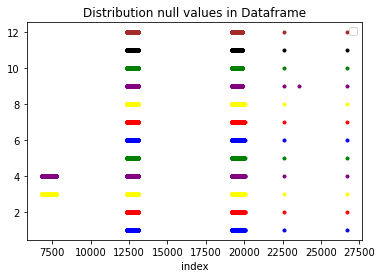

In [37]:
import matplotlib.pyplot as plt
fig=plt.figure() #create the space of the plot
ax=fig.add_subplot(111) #allow define the amount of graphs in a plot
ax.scatter(x1,y1, color='blue', marker='.') #create scater plot
ax.scatter(x2,y2, color='red', marker='.')
ax.scatter(x3,y3, color='yellow', marker='.')
ax.scatter(x4,y4, color='purple', marker='.')
ax.scatter(x5,y5, color='green', marker='.')
ax.scatter(x6,y6, color='blue', marker='.')
ax.scatter(x7,y7, color='red', marker='.')
ax.scatter(x8,y8, color='yellow', marker='.')
ax.scatter(x9,y9, color='purple', marker='.')
ax.scatter(x10,y10, color='green', marker='.')
ax.scatter(x11,y11, color='black', marker='.')
ax.scatter(x12,y12, color='brown', marker='.')


#Legends
ax.set(title='Distribution null values in Dataframe', xlabel='index')
ax.legend(loc='best') 
plt.show()

In the plot, we can see the distribution of the null values. The data show that exists one distribution uniform of the null values in ranges. That means the data have empty in broad ranges. Then, is most convenient drop these null values:

In [38]:
#drop null values of data that we don't want to fill
print("we have",df_stats.shape[0],"records in the dataframe of stats before drop rows")
df_stats=df_stats.dropna(subset=['hs','AS','hf',"hst","ast",'af','hc','ac','hy','ay','hr','ar'])
print("we have",df_stats.shape[0],"records in the dataframe of stats after drop rows")

we have 28133 records in the dataframe of stats before drop rows
we have 25752 records in the dataframe of stats after drop rows


Now we can do the previous steps to another dataframes:

In [39]:
df_attendance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13280 entries, 0 to 13279
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   hometeam    13280 non-null  object        
 1   awayteam    13280 non-null  object        
 2   attendance  13252 non-null  float64       
 3   DATE        13280 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 415.1+ KB


In the dataframe of attendance, we have only eight records with null values. However, when we clean the dataframe of the records of attendance and stats together, the records without null values are less:

In [40]:
print("we have",df_stats_attendance.shape[0],"records in the dataframe of attendance and stats before drop rows")
df_stats_attendance=df_stats_attendance.drop("referee",axis=1)
df_stats_attendance=df_stats_attendance.dropna(subset=['hthg','htag','htr','hs','AS','hf',"hst","ast",'af','hc','ac','hy','ay','hr','ar','attendance'])
print("we have",df_stats_attendance.shape[0],"records in the dataframe of attendance and stats after drop rows")

we have 11451 records in the dataframe of attendance and stats before drop rows
we have 10914 records in the dataframe of attendance and stats after drop rows


In [41]:
print("we have",df_stats_market.shape[0],"records in the dataframe of market value and stats before drop rows")
df_stats_market=df_stats_market.drop("referee",axis=1)
df_stats_market=df_stats_market.dropna(subset=['hthg','htag','htr','hs','AS','hf',"hst","ast",'af','hc','ac','hy','ay','hr','ar','market value hometeam','market value awayteam'])
print("we have",df_stats_market.shape[0],"records in the dataframe of market value and stats after drop rows")

we have 28147 records in the dataframe of market value and stats before drop rows
we have 25002 records in the dataframe of market value and stats after drop rows


In [42]:
print("we have",df_stats_attendance_market.shape[0],"records in the dataframe of stats, attendance and market value before drop rows")
df_stats_attendance_market=df_stats_attendance_market.drop("referee",axis=1)
df_stats_attendance_market=df_stats_attendance_market.dropna(subset=['hthg','htag','htr','hs','AS','hf',"hst","ast",'af','hc','ac','hy','ay','hr','ar','attendance','market value hometeam','market value awayteam'])
print("we have",df_stats_attendance.shape[0],"records in the dataframe of stats, attendance and market value after drop rows")

we have 11458 records in the dataframe of stats, attendance and market value before drop rows
we have 10914 records in the dataframe of stats, attendance and market value after drop rows


![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png) 
# 3. Models building

In this step, we will create models of prediction with the dataframes fixed in the previous steps, and compare themselves. Before creating these models, we can explore the data and get insights useful to the models building.

## 3.1 Exploratory Data Analysis

One good way to find out insights into the data is to plot them. In the next lines code, we will plot the data using as dependent variable "y" the result of the football matches.

First, we transform variables of the results in the matches (column "ftr"). To analyze the data, we transform these categorical variables into numerical, considering the results for the Home team. Then we transform them like following:

H=3 (In football the winner get three points)  
D=1 (In football a draw give two points)  
A=0 (In football the loser don't get points)  

The following line transforms the variables:

In [43]:
df_stats['ftr']=df_stats['ftr'].replace(['H','D','A',],['3','1','0']).astype(int)
df_stats_attendance['ftr']=df_stats_attendance['ftr'].replace(['H','D','A',],['3','1','0']).astype(int)
df_stats_market['ftr']=df_stats_market['ftr'].replace(['H','D','A',],['3','1','0']).astype(int)
df_stats_attendance_market['ftr']=df_stats['ftr'].replace(['H','D','A',],['3','1','0']).astype(int)

In [44]:
#repeat previous code to variable htr= half time result
df_stats['htr']=df_stats['htr'].replace(['H','D','A',],['3','1','0']).astype(int)
df_stats_attendance['htr']=df_stats_attendance['htr'].replace(['H','D','A',],['3','1','0']).astype(int)
df_stats_market['htr']=df_stats_market['htr'].replace(['H','D','A',],['3','1','0']).astype(int)
df_stats_attendance_market['htr']=df_stats['htr'].replace(['H','D','A',],['3','1','0']).astype(int)

Now, we'll plot the records of df_stats:

Text(0.5, 0, 'half time away goals')

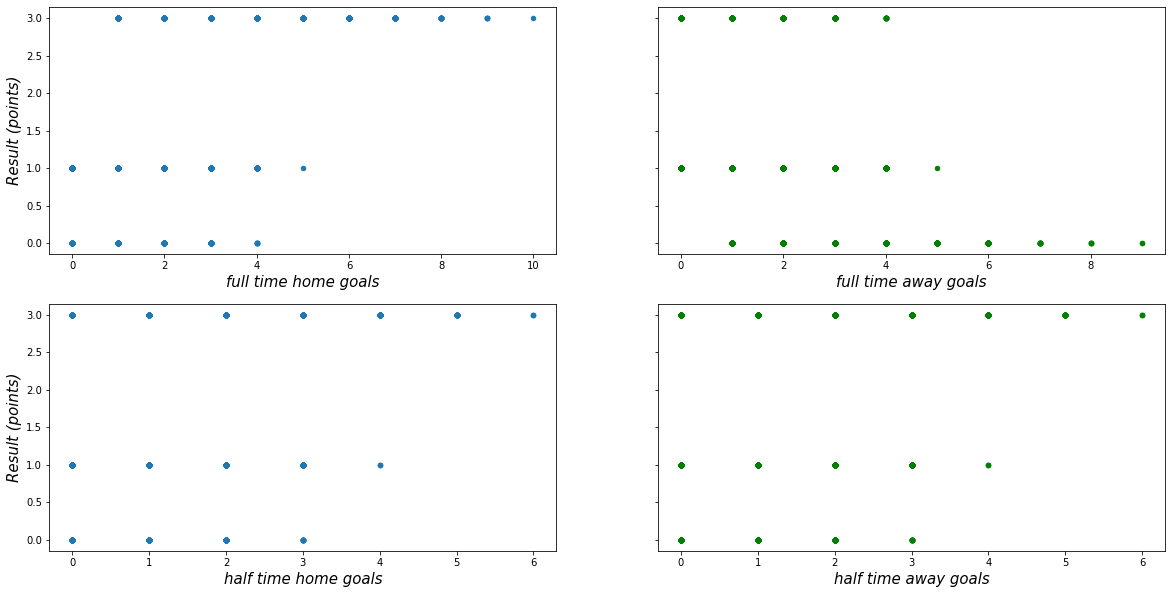

In [45]:
#plot the data
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = [20, 10]

fig, axs = plt.subplots(2, 2,sharey=True)

df_stats.plot(kind='scatter',x="fthg",y="ftr",ax=axs[0][0],fontsize=10)
axs[0][0].set_xlabel('full time home goals',fontsize=15,fontstyle='italic')
axs[0][0].set_ylabel('Result (points)',fontsize=15,fontstyle='italic')

df_stats.plot(kind='scatter',x="ftag",y="ftr",ax=axs[0][1],color='green',fontsize=10)
axs[0][1].set_xlabel('full time away goals',fontsize=15,fontstyle='italic')

df_stats.plot(kind='scatter',x="hthg",y="ftr",ax=axs[1][0],fontsize=10)
axs[1][0].set_xlabel('half time home goals',fontsize=15,fontstyle='italic')
axs[1][0].set_ylabel('Result (points)',fontsize=15,fontstyle='italic')

df_stats.plot(kind='scatter',x="hthg",y="ftr",ax=axs[1][1],color='green',fontsize=10)
axs[1][1].set_xlabel('half time away goals',fontsize=15,fontstyle='italic')

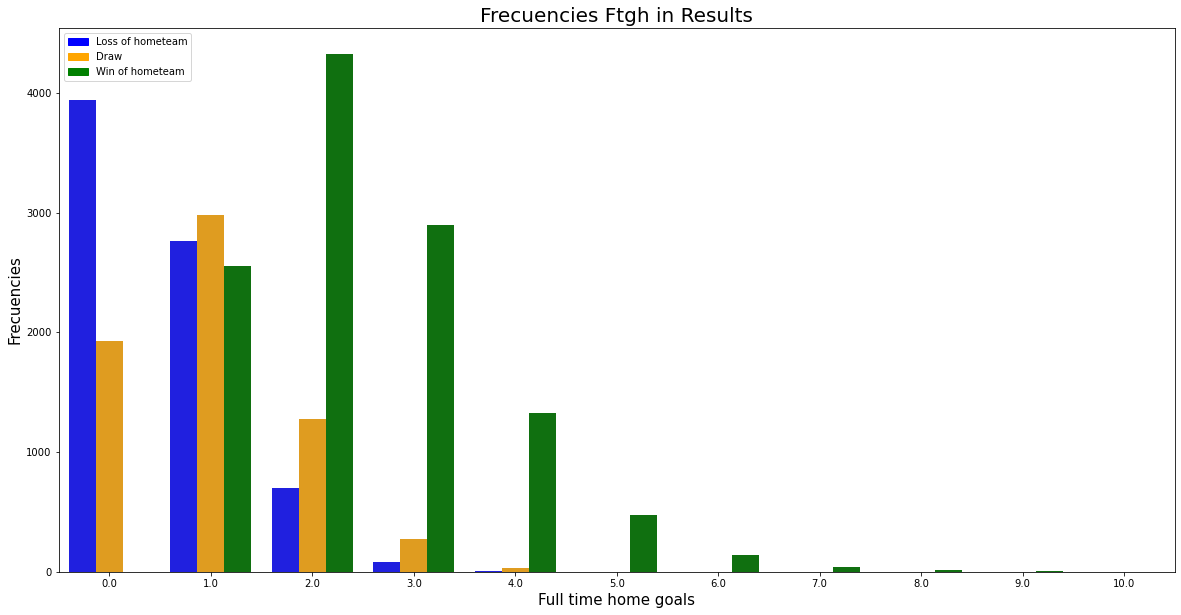

In [58]:
import seaborn as sns
palette = ["blue","orange","green"]
sns.set_palette(palette)

sns.countplot(x='fthg',data=df_stats,hue='ftr')
plt.title("Frecuencies Ftgh in Results",fontsize=20)
plt.ylabel("Frecuencies",fontsize=15)
plt.xlabel("Full time home goals",fontsize=15)
plt.tick_params(labelsize=10)

plt.legend(loc='upper left')

#creating legend
blue_patch = mpatches.Patch(color='blue', label="Loss of hometeam")
orange_patch = mpatches.Patch(color='orange', label="Draw")
green_patch = mpatches.Patch(color='green', label="Win of hometeam")
plt.legend(handles=[blue_patch,orange_patch,green_patch],fontsize=10)

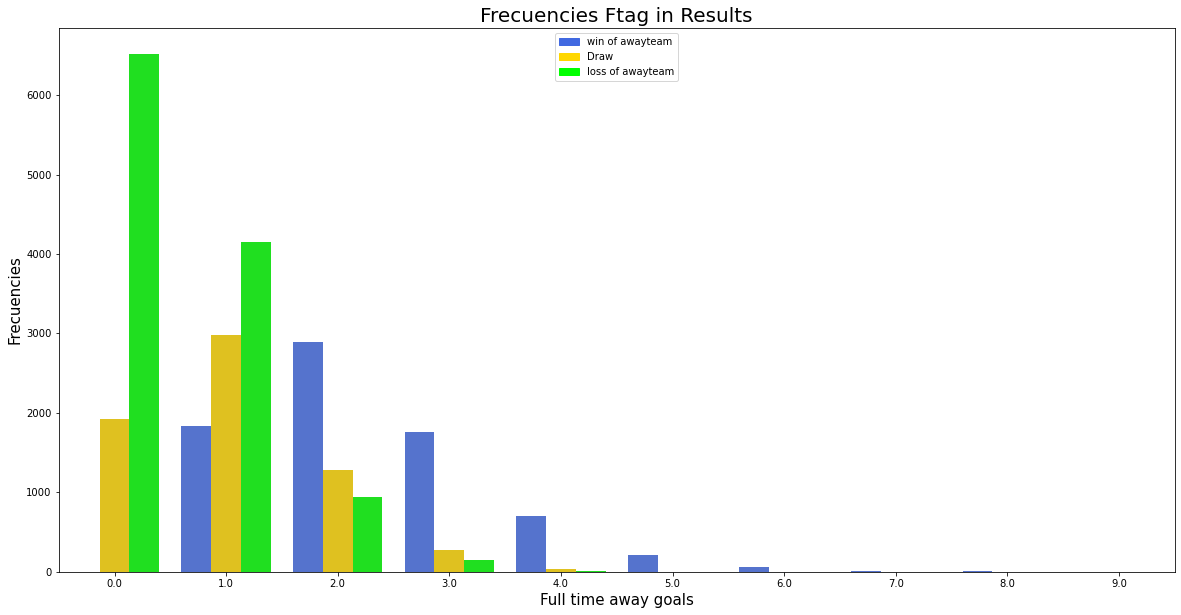

In [61]:
palette = ["royalblue","gold","lime"]
sns.set_palette(palette)

sns.countplot(x='ftag',data=df_stats,hue='ftr')
plt.title("Frecuencies Ftag in Results",fontsize=20)
plt.ylabel("Frecuencies",fontsize=15)
plt.xlabel("Full time away goals",fontsize=15)
plt.tick_params(labelsize=10)

plt.legend(loc='upper left')

#creating legend
blue_patch = mpatches.Patch(color='royalblue', label="win of awayteam")
orange_patch = mpatches.Patch(color='gold', label="Draw")
green_patch = mpatches.Patch(color='lime', label="loss of awayteam")
plt.legend(handles=[blue_patch,orange_patch,green_patch],fontsize=10)

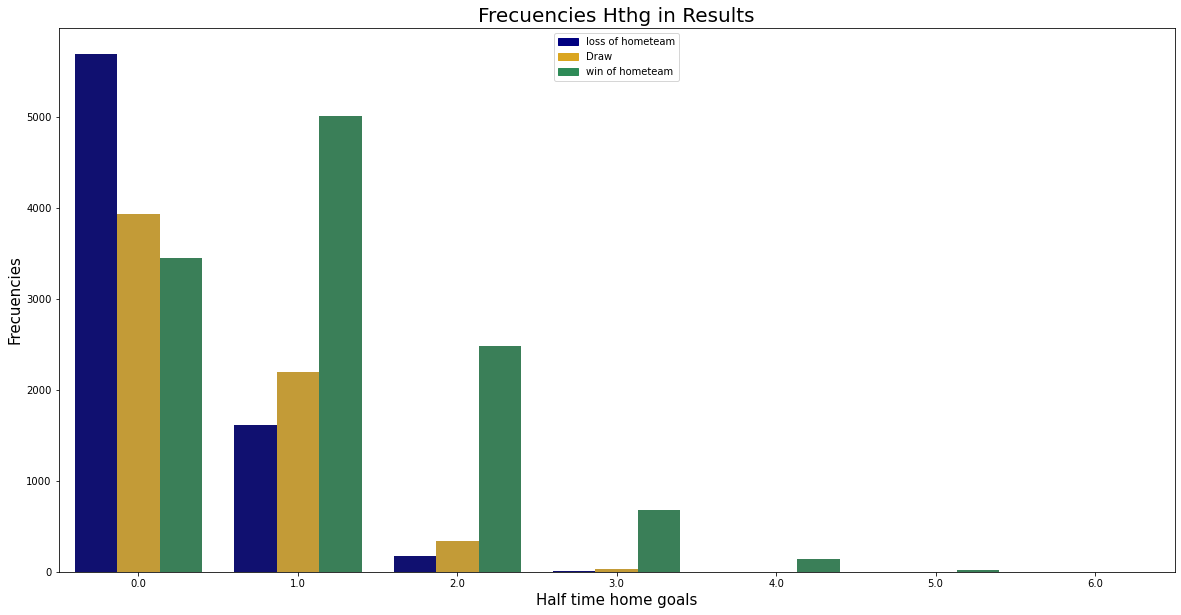

In [62]:
palette = ["navy","goldenrod","seagreen"]
sns.set_palette(palette)

sns.countplot(x='hthg',data=df_stats,hue='ftr')
plt.title("Frecuencies Hthg in Results",fontsize=20)
plt.ylabel("Frecuencies",fontsize=15)
plt.xlabel("Half time home goals",fontsize=15)
plt.tick_params(labelsize=10)

plt.legend(loc='upper left')

#creating legend
blue_patch = mpatches.Patch(color='navy', label="loss of hometeam")
orange_patch = mpatches.Patch(color='goldenrod', label="Draw")
green_patch = mpatches.Patch(color='seagreen', label="win of hometeam")
plt.legend(handles=[blue_patch,orange_patch,green_patch],fontsize=10)

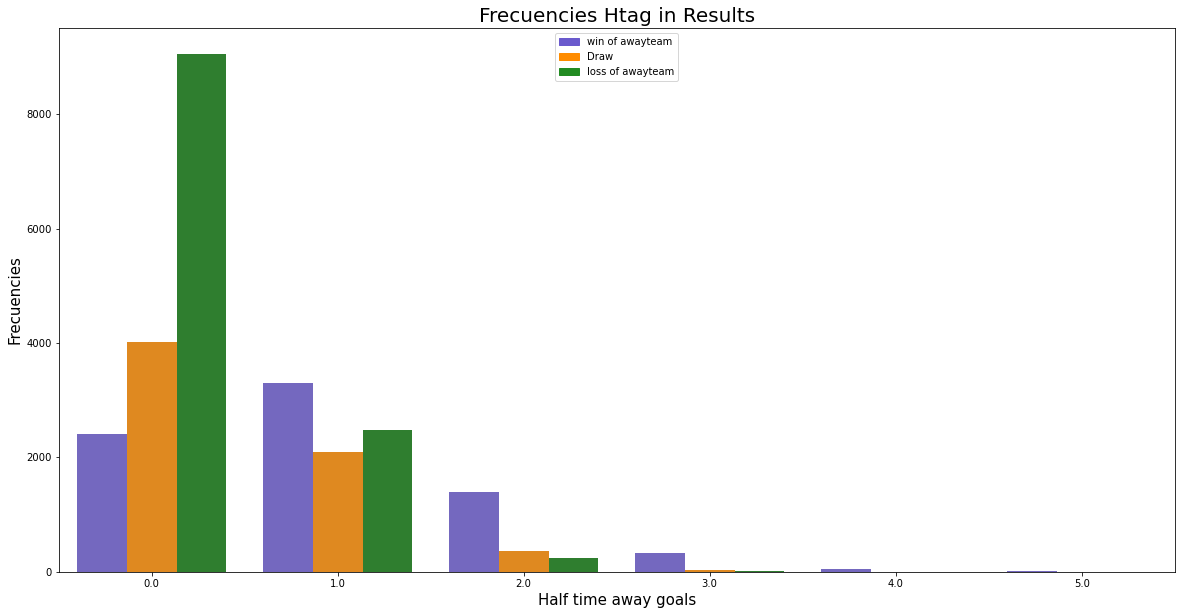

In [64]:
palette = ["slateblue","darkorange","forestgreen"]
sns.set_palette(palette)

sns.countplot(x='htag',data=df_stats,hue='ftr')
plt.title("Frecuencies Htag in Results",fontsize=20)
plt.ylabel("Frecuencies",fontsize=15)
plt.xlabel("Half time away goals",fontsize=15)
plt.tick_params(labelsize=10)

plt.legend(loc='upper left')

#creating legend
blue_patch = mpatches.Patch(color='slateblue', label="win of awayteam")
orange_patch = mpatches.Patch(color='darkorange', label="Draw")
green_patch = mpatches.Patch(color='forestgreen', label="loss of awayteam")
plt.legend(handles=[blue_patch,orange_patch,green_patch],fontsize=10)

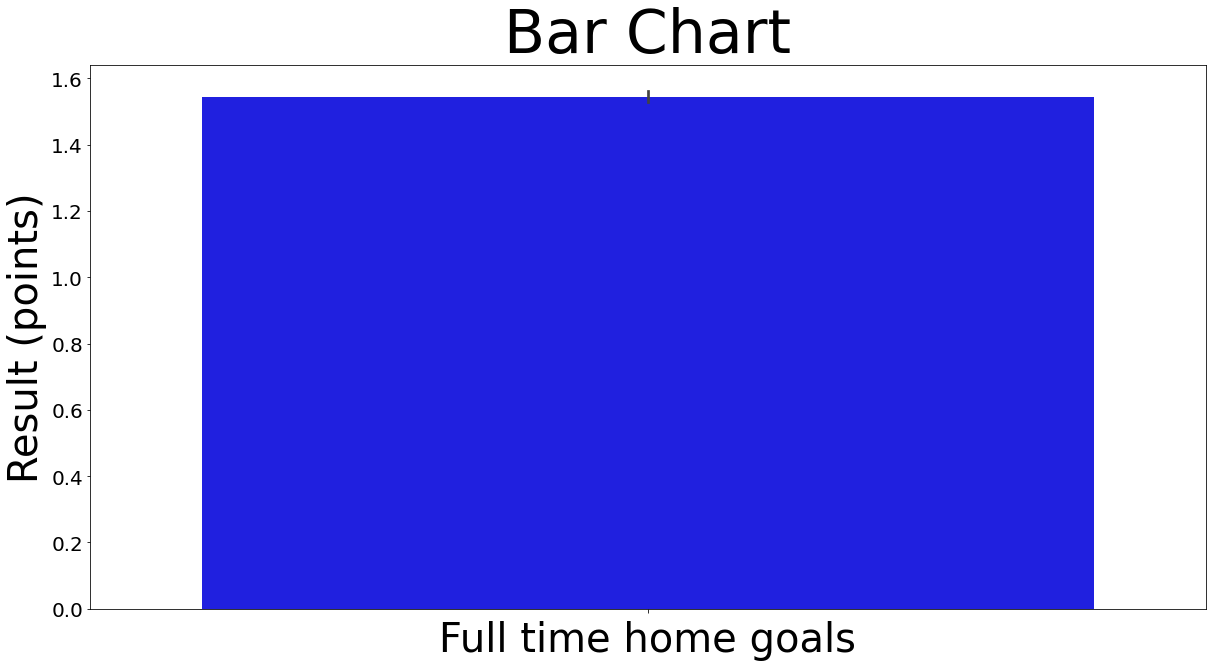

In [49]:
#bar chart
import seaborn as sns
import matplotlib.patches as mpatches

sns.barplot(y="fthg",data=df_stats,color="blue")

plt.title("Bar Chart",fontsize=60)
plt.ylabel("Result (points)",fontsize=40)
plt.xlabel("Full time home goals",fontsize=40)
plt.tick_params(labelsize=20)
#plt.legend(loc='upper left')

#creating legend
#blue_patch = mpatches.Patch(color='blue', label="results before pandemic")
#yellow_patch = mpatches.Patch(color='yellow', label="results during pandemic")
#plt.legend(handles=[blue_patch,yellow_patch],fontsize=30)

In [ ]:
df_stats.plot(kind='scatter',x="hs",y="ftr",ax=axs[1][0])
df_stats.plot(kind='scatter',x="AS",y="ftr",ax=axs[1][1])
df_stats.plot(kind='scatter',x="hst",y="ftr",ax=axs[1][2])
df_stats.plot(kind='scatter',x="ast",y="ftr",ax=axs[1][3])
df_stats.plot(kind='scatter',x="hf",y="ftr",ax=axs[2][0])
df_stats.plot(kind='scatter',x="af",y="ftr",ax=axs[2][1])
df_stats.plot(kind='scatter',x="hc",y="ftr",ax=axs[2][2])
df_stats.plot(kind='scatter',x="ac",y="ftr",ax=axs[2][3])
df_stats.plot(kind='scatter',x="hy",y="ftr",ax=axs[3][0])
df_stats.plot(kind='scatter',x="ay",y="ftr",ax=axs[3][1])
df_stats.plot(kind='scatter',x="hr",y="ftr",ax=axs[3][2])
df_stats.plot(kind='scatter',x="ar",y="ftr",ax=axs[3][3])

In [ ]:
axs[0, 0].scatter(x, y)
axs[0, 0].set_title('attendance',fontsize=60)
axs[0, 0].tick_params(labelsize=30)
axs[0, 0].set_ylabel('local points',fontsize=40, fontstyle='italic')

axs[0, 1].plot(x, y1, 'tab:orange')
axs[0, 1].set_title('predict loses',fontsize=60)
axs[0, 1].tick_params(labelsize=30)
axs[0, 1].set_ylabel('odds',fontsize=40,fontstyle='italic')


axs[1, 0].plot(x, y2, 'tab:green')
axs[1, 0].set_title('predict draws',fontsize=60)
axs[1, 0].tick_params(labelsize=30)
axs[1, 0].set_ylabel('odds',fontsize=40,fontstyle='italic')
axs[1, 0].set_xlabel('attendance',fontsize=40,fontstyle='italic')

axs[1, 1].plot(x, y3, 'tab:red')
axs[1, 1].set_title('predict wins',fontsize=60)
axs[1, 1].tick_params(labelsize=30)
axs[1, 1].set_ylabel('odds',fontsize=40,fontstyle='italic')
axs[1, 1].set_xlabel('attendance',fontsize=40,fontstyle='italic')
    
plt.rcParams['figure.figsize'] = [60, 30]

In [97]:
df_stats.head()

,DATE,hometeam,awayteam,fthg,ftag,ftr,hthg,htag,htr,hs,...,ast,hf,af,hc,ac,hy,ay,hr,ar,season
0,2003-08-16,Arsenal,Everton,2.0,1.0,3,1.0,0.0,3,11.0,...,7.0,8.0,15.0,6.0,9.0,1.0,3.0,1.0,1.0,2003
1,2003-08-16,Birmingham,Tottenham,1.0,0.0,3,1.0,0.0,3,10.0,...,7.0,20.0,27.0,1.0,4.0,3.0,5.0,0.0,0.0,2003
2,2003-08-16,Blackburn,Wolves,5.0,1.0,3,2.0,0.0,3,25.0,...,5.0,8.0,14.0,6.0,2.0,1.0,1.0,0.0,0.0,2003
3,2003-08-16,Fulham,Middlesbrough,3.0,2.0,3,1.0,1.0,1,17.0,...,5.0,18.0,16.0,7.0,6.0,1.0,1.0,0.0,0.0,2003
4,2003-08-16,Leicester,Southampton,2.0,2.0,1,2.0,0.0,3,12.0,...,10.0,27.0,15.0,2.0,7.0,3.0,1.0,0.0,0.0,2003


In [99]:
df_stats.columns.values

array(['DATE', 'hometeam', 'awayteam', 'fthg', 'ftag', 'ftr', 'hthg',
       'htag', 'htr', 'hs', 'AS', 'hst', 'ast', 'hf', 'af', 'hc', 'ac',
       'hy', 'ay', 'hr', 'ar', 'season'], dtype=object)

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png) 
### Exploratory Data Analysis

The first step after preparing the data is to plot them and find out correlations.

In [ ]:
import matplotlib.pyplot as plt
x=dataframe['attendance'] # variable in the axis "x"
y=dataframe['ftr'] #variable in the axis "y"
fig=plt.figure() #create the space of the plot
ax=fig.add_subplot(111) #allow define the amount of graphs in a plot
ax.scatter(x,y, color='blue', marker='.') #create scater plot

#Legends
ax.set(title='Attendance vs Result', ylabel='points of Home team', xlabel='Attendance')
ax.legend(loc='best') 
plt.show()

In the plot, we can see that exists one outlier that is an error, so that isn't possible an attendance bigger than 500000 people. Then is necessary to drop the outlier values.

In [ ]:
list_attendance_errors=[]
for i in dataframe['attendance']:
    if i>150000:
        print("outlier : ",i)
        list_attendance_errors.append(dataframe['attendance'][ dataframe['attendance']== i].index[0])
        
dataframe=dataframe.drop(list_attendance_errors,axis=0)

In [ ]:
#plot new graph
x=dataframe['attendance'] # variable in the axis "x"
y=dataframe['ftr'] #variable in the axis "y"
fig=plt.figure() #create the space of the plot
ax=fig.add_subplot(111) #allow define the amount of graphs in a plot
ax.scatter(x,y, color='blue', marker='.') #create scater plot

#Legends
ax.set(title='Attendance vs Result', ylabel='points of Home team', xlabel='Attendance')
ax.legend(loc='best') 
plt.show()

In the previous graph isn't possible to find out one correlation between the variables, however, we can analyze the data doing a transformation to logistic function. This is the function most approximately to the behavior of the data:  

$$ f(x)=\frac{L}{1+e^{-k(x-x_0)}}$$  


$f(x)$	=	output of the function  
$L$	=	the curve's maximum value  
$k$	=	logistic growth rate or steepness of the curve  
$x_0$	=	the x value of the sigmoid midpoint  
$x$	=	real number    

The logistic function is broadly used to analyze probabilities due to its shape, in which the maximum value is the 100% probability that the event occurs and the minimum value is the 0% probability. The following curve is an example of  the logistic function:
  
<br>
<br>
<center>
    <img src="https://upload.wikimedia.org/wikipedia/commons/8/88/Logistic-curve.svg" width="450" alt="soccer.logo"  />
</center>
<br>
  

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png) 
## Logistic Regression

With the logistic regression, we get a model in which represents the behavior of the data following the sigmoid function. There are three types of logistic Regression:  

**Binary Logistic Regression**: The target variable has only two possible outcomes as Spam or Not Spam, Cancer, or No Cancer. 

**Multinomial Logistic Regression**: The target variable has three or more nominal categories such as predicting the type of Wine.  

**Ordinal Logistic Regression**: the target variable has three or more ordinal categories such as restaurant or product rating from 1 to 5.

Our data are in the third case, Ordinal logistic regression. Then, to analyze the data we can use the function OrderedLogit that allows us to find out the functions considering when there is victory, draw or defeat:

In [ ]:
import sys
!conda install git #install git if you enviroment don't have it
!pip install git+https://github.com/Shopify/bevel.git #install library bevel
!pip install numdifftools #install numdiftools library

In [ ]:
from bevel.linear_ordinal_regression import OrderedLogit #import bevel library

In [ ]:
model_ord_logit=OrderedLogit()
x=dataframe['attendance'] # variable in the axis "x"
y=dataframe['ftr'] #variable in the axis "y"
model_ord_logit.fit(x,y)#fit the model to data
model_ord_logit.print_summary() #print summary of the coefficients

### Obtain the coefficients, the intercepts, and the standard errors
The intercepts define the thresholds between a loss and a draw (L|D) and draw and a win (D|W). The probabilities are dependent on (a) the coefficient (i.e., attendance) and (b) the intercepts. 

In [ ]:
# Obtain the coefficients and the intercepts
print(f'beta = {model_ord_logit.coef_[0]:.9f}')
print(f'interceptL|D = {model_ord_logit.coef_[1]:.4f}')
print(f'interceptD|W = {model_ord_logit.coef_[2]:.4f}')
print(model_ord_logit.coef_)

In [ ]:
#Standar errors
print(model_ord_logit.se_)

### Interpreting the coefficients

We obtain two functions that represent the probabilities of events (win, draw or lose):  

$$ f(L/D)=\frac{1}{1+e^{0.4734+1.42496e-05*attendance}}$$  

$$ f(D/W)=\frac{1}{1+e^{-0.6124+1.42496e-05*attendance}}$$  

The Somers' D value is a measure of the goodness-of-fit of the model, analogous to the R² value in ordinary linear regression. However, unlike R², it can vary between -1 (totally discordant) and 1 (totally concordant). We get a Somers' D = 0.100 in the model, which represents close to 55% of goodness-of-fit. About the standard errors of the coefficients, we get values very low, though we get one error to the third coefficient, probably due to the magnitude of the coefficient.

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png) 
### Ploting the models

We can plot the functions together with the data to visualize the behavior that our model describes. First, we calculate the values of the curve and then plot them:

In [ ]:
#create the data
import numpy as np
dataframe['predL']=1/(1+np.exp(-(model_ord_logit.coef_[1]-model_ord_logit.coef_[0]*dataframe['attendance']))) #predict of loses
dataframe['predD']=1/(1+np.exp(-(model_ord_logit.coef_[2]-model_ord_logit.coef_[0]*dataframe['attendance'])))-dataframe['predL'] #predict of draws
dataframe['predW']=1-dataframe['predL']-dataframe['predD'] #predict of Wins

In [ ]:
#plot the data

y1=dataframe['predL'] # variable in the axis "y"
y2=dataframe['predD']
y3=dataframe['predW']

fig, axs = plt.subplots(2, 2)
axs[0, 0].scatter(x, y)
axs[0, 0].set_title('attendance',fontsize=60)
axs[0, 0].tick_params(labelsize=30)
axs[0, 0].set_ylabel('local points',fontsize=40, fontstyle='italic')

axs[0, 1].plot(x, y1, 'tab:orange')
axs[0, 1].set_title('predict loses',fontsize=60)
axs[0, 1].tick_params(labelsize=30)
axs[0, 1].set_ylabel('odds',fontsize=40,fontstyle='italic')


axs[1, 0].plot(x, y2, 'tab:green')
axs[1, 0].set_title('predict draws',fontsize=60)
axs[1, 0].tick_params(labelsize=30)
axs[1, 0].set_ylabel('odds',fontsize=40,fontstyle='italic')
axs[1, 0].set_xlabel('attendance',fontsize=40,fontstyle='italic')

axs[1, 1].plot(x, y3, 'tab:red')
axs[1, 1].set_title('predict wins',fontsize=60)
axs[1, 1].tick_params(labelsize=30)
axs[1, 1].set_ylabel('odds',fontsize=40,fontstyle='italic')
axs[1, 1].set_xlabel('attendance',fontsize=40,fontstyle='italic')
    
plt.rcParams['figure.figsize'] = [60, 30]

### Interpreting the plots

1-The first plot (up-left) is the original behavior of the attendance records without transforming them. We can see that the distribution of the data doesn't have a pattern clear.

2-The second plot (up-right) is the relationship between attendance vs probabilities of the losses. The graph shows the behavior of the data of attendance in the losses probabilities. We can see one inverse relationship while growing the attendance downs the loss probability.

3-The third plot (down-left) is the relationship between vs probabilities of the draws. The graph shows the behavior of the data of attendance in the draws probabilities. We can see one inverse relationship while growing the attendance down the draw probability.

4-The fourth plot (down-right) is the relationship between attendance vs probabilities of the wins. The graph shows the behavior of the data of attendance in the wins probabilities. We can see one direct relationship while growing the attendance grow the win probability.  

**_The plots suggest that attendance affect positively the propability of win of the local team._**

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png) 
### Using the model to predict  

Though the graphs show a behavior, is necessary to assess the results of the model vs original data, and then consider a strong relationship between attendance and the result of matches. In this case, we don't interest analyze the performance of the model to predict future data. Therefore we don't analyze parameters like overfitting.  

The following code calculates the values of prediction:


In [ ]:
# Obtain the fitted probabilities of each event 
model_ord_logit.predict_probabilities(dataframe[['attendance']])

In [ ]:
# Returns the output with highest probability 
model_ord_logit.predict_class(dataframe[['attendance']])

The method **predict_class** estimate the ordinal variables (0,1,3) with the highest probability, example:  
for one attendance of 30.000 people we get the probabilities:  
win=0.6  
draw=0.2   
lose=0.2  

Then the method retrieves as a result the value "3" that corresponds to the value to win.

In [ ]:
#Convert array into dataframe to compare with the true values
fitted_results = model_ord_logit.predict_class(dataframe[['attendance']])
fitted_results_df = pd.DataFrame(fitted_results, columns = ['fitted_results'])
fitted_results_df.shape

In [ ]:
# Append the fitted results to data frame to compare them with true values in "ftr" column
dataframe ['fitted_results'] = fitted_results_df
dataframe.head()

In [ ]:
# Obtain the success rate
dataframe['TRUE'] = np.where(dataframe['fitted_results']==dataframe['ftr'], 1, 0)
Total = dataframe['TRUE'].sum() #calculate the number of values that are the same
print("success rate : ",Total/int(fitted_results_df.shape[0]))

**_The score shows the model predicts 45% of the results. This value suggests that attendance can be considered like one variable that affects the result of the match. However, we must be careful to take a conclusion only with this analysis. It's necessary to consider that the effect showed can be due only to the fact that the team is local without having an account of the assistance value._**

Then we can estimate the success rate of the data before and during the pandemic, which the teams had that play without the crowd. This way we can compare if exist one difference between the results considering the assistance.  

The pandemic in football began in march of the year 2020, so that we split the dataframe in two, using the date 01/03/2020:

In [ ]:
#creating the subsets

pandemic = pd.datetime(2020,3,7)

before_pandemic= dataframe.loc[pd.to_datetime(dataframe['DATE'],format='%Y-%m-%d') <= pandemic]
on_pandemic= dataframe.loc[pd.to_datetime(dataframe['DATE'],format='%Y-%m-%d')> pandemic]

on_pandemic.head()

In [ ]:
print("we have",before_pandemic.shape[0],"records in the dataframe before the pandemic")

In [ ]:
print("we have",on_pandemic.shape[0],"records in the dataframe during the pandemic")

In [ ]:
# Obtain the success rate

subtotal_on_pandemic = on_pandemic['TRUE'].sum() #calculate the number of values that are the same
print("success rate during the pandemic : ",subtotal_on_pandemic/int(on_pandemic.shape[0]))

subtotal_before_pandemic = before_pandemic['TRUE'].sum()
print("success rate before pandemic : ",subtotal_before_pandemic/int(before_pandemic.shape[0]))

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)  

The results show that the prediction of the data on the pandemic have lower success than before the pandemic. However, the difference can be due to the fit of the model to the subset of the data. Then we can repeat the previous steps and create two models for each dataset, before and during the pandemic:

In [ ]:
#drop colums. Dataframe Cleaning.
before_pandemic=before_pandemic.drop(["predL","predD","predW","fitted_results","TRUE"],axis=1).reset_index()
on_pandemic=on_pandemic.drop(["predL","predD","predW","fitted_results","TRUE"],axis=1).reset_index()

x2=before_pandemic['attendance'] # variable in the axis "x"
y2=before_pandemic['ftr'] #variable in the axis "y"

x3=on_pandemic['attendance'] # variable in the axis "x"
y3=on_pandemic['ftr'] #variable in the axis "y"

model_ord_logit2=OrderedLogit()
model_before_pandemic=model_ord_logit2.fit(x2,y2)#fit the model to data
model_ord_logit3=OrderedLogit()
model_on_pandemic=model_ord_logit3.fit(x3,y3)

#Convert array into dataframe to compare with the true values
fitted_results_before_pandemic = model_before_pandemic.predict_class(before_pandemic[['attendance']])
fitted_results_before_pandemic = pd.DataFrame(fitted_results_before_pandemic, columns = ['fitted_results'])
before_pandemic['fitted_results'] = fitted_results_before_pandemic

fitted_results_on_pandemic = model_on_pandemic.predict_class(on_pandemic[['attendance']])
fitted_results_on_pandemic = pd.DataFrame(fitted_results_on_pandemic, columns = ['fitted_results'])
on_pandemic['fitted_results'] = fitted_results_on_pandemic

# Obtain the success rate
before_pandemic['TRUE'] = np.where(before_pandemic['fitted_results']==before_pandemic['ftr'], 1, 0)
sub_total_before_pandemic = before_pandemic['TRUE'].sum() #calculate the number of values that are the same

on_pandemic['TRUE'] = np.where(on_pandemic['fitted_results']==on_pandemic['ftr'], 1, 0)
sub_total_on_pandemic = on_pandemic['TRUE'].sum() #calculate the number of values that are the same

print("success predictions model during the pandemic : ",sub_total_on_pandemic)
print("success predictions model before the pandemic : ",sub_total_before_pandemic)

In [ ]:
print("success rate before pandemic new model : ",sub_total_before_pandemic/int(before_pandemic.shape[0]))
print("success rate during the pandemic new model : ",sub_total_on_pandemic/int(on_pandemic.shape[0]))

In [ ]:
model_before_pandemic.print_summary() #print summary of the coefficients

In [ ]:
model_on_pandemic.print_summary() #print summary of the coefficients

In [ ]:
# Obtain the coefficients and the intercepts
print(f'beta = {model_before_pandemic.coef_[0]:.9f}')
print(f'interceptL|D = {model_before_pandemic.coef_[1]:.4f}')
print(f'interceptD|W = {model_before_pandemic.coef_[2]:.4f}')
print(model_before_pandemic.coef_)

In [ ]:
# Obtain the coefficients and the intercepts
print(f'beta = {model_on_pandemic.coef_[0]:.9f}')
print(f'interceptL|D = {model_on_pandemic.coef_[1]:.4f}')
print(f'interceptD|W = {model_on_pandemic.coef_[2]:.4f}')
print(model_on_pandemic.coef_)

The results confirm that the model using only the data of attendance during the pandemic is worse than the model using the data before the pandemic. The score Somers'D is mayor using the data before the pandemic and the success rate is better: 

|**model**           |**Somer's D**  |**Success Rate**|
| -------------------| --------------|------------   |
| Before pandemic    |  0.097        |  0.46207      |
| On pandemic        |  0.001        |  0.39532      |                        
  
  
**_Then we can consider that assistance is one variable that affects the results of the football matches._**


![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)   

## Statistic Analysis

Further, analyze the data using models and find out correlations, we can use the descriptive statistics to compare the performance of the teams individual and general both during the pandemic and previously to this.

### Compare the results with crowd vs without crowd.

The first step most obviously in the statistical analysis is to compare the rate of victory of the home team before the pandemic vs during the pandemic.  
How the teams through years change your performance it's convenient to compare the data of the last year previous to the pandemic for each team:

In [ ]:
#create dataframe of the year previous pandemic

last_year=pd.datetime(2018,7,1)
last_year_pandemic=before_pandemic.loc[pd.to_datetime(before_pandemic['DATE'],format='%Y-%m-%d')>=last_year]
last_year_pandemic.head()

In [ ]:
#calculate the count of the matches for each local team
statistics_before_pandemic=last_year_pandemic[['hometeam','attendance','ftr']].groupby(['hometeam']).agg(['mean']).reset_index()
statistics_on_pandemic=on_pandemic[['hometeam','attendance','ftr']].groupby(['hometeam']).agg(['mean']).reset_index()

In [ ]:
statistics_before_pandemic.head()

In [ ]:
statistics_on_pandemic.head()

In [ ]:
#rename columns
statistics_before_pandemic=statistics_before_pandemic.rename(columns={"attendance": "attendance_before_pandemic", "ftr": "result_before_pandemic"})

In [ ]:
#rename columns
statistics_on_pandemic=statistics_on_pandemic.rename(columns={"attendance": "attendance_on_pandemic", "ftr": "result_on_pandemic"})

In [ ]:
statistics_on_pandemic=statistics_on_pandemic.droplevel(level=1,axis=1) #drop index
statistics_before_pandemic=statistics_before_pandemic.droplevel(level=1,axis=1)

In [ ]:
#join dataframes
statistics_df= pd.merge(left=statistics_before_pandemic, right=statistics_on_pandemic,how='inner',left_on="hometeam",right_on="hometeam")
statistics_df.head()

In [ ]:
#plot the data
import seaborn as sns
import matplotlib.patches as mpatches

sns.barplot(y="hometeam",x="result_before_pandemic",data=statistics_df,color="blue",orient="h")
sns.barplot(y="hometeam",x="result_on_pandemic",data=statistics_df,color="yellow",orient="h")
plt.title("Results mean (points) of the teams before pandemic vs during pandemic",fontsize=60)
plt.ylabel("Teams",fontsize=40)
plt.xlabel("Results mean (points)",fontsize=40)
plt.tick_params(labelsize=20)
plt.legend(loc='upper left')

#creating legend
blue_patch = mpatches.Patch(color='blue', label="results before pandemic")
yellow_patch = mpatches.Patch(color='yellow', label="results during pandemic")
plt.legend(handles=[blue_patch,yellow_patch],fontsize=30)

**The graph shows that in general, the teams got lower results like local during the pandemic vs before the pandemic. Further, we can calculate the count of teams that got lower results during the pandemic:**

In [ ]:
#creating validation column
statistics_df["validation"]=np.where(statistics_df['result_before_pandemic']>statistics_df['result_on_pandemic'],1,0)
total_validation = statistics_df["validation"].sum()

print("percent teams with results better before the pandemic vs during the pandemic : ",total_validation/int(statistics_df.shape[0]))
print("mean points got before the pandemic of local: ",statistics_df["result_before_pandemic"].mean())
print("mean points got during the pandemic of local: ",statistics_df["result_on_pandemic"].mean())

**Though the performance of one team can change between seasons, it's clear that exist one loss of the performance of local teams in the general. The data show a loss of 20% in the performance in general of teams.**

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)  

## CONCLUSIONS

The analysis developed suggests:

1-The attendance affects the results of the local teams positively. The regression model suggests that attendance major gives one advantage to the local teams. Further, we can consider attendance as a good predictor of the results of the matches.

2-The statistic analysis verifies the results get on the regression model, comparing the results of the matches during the pandemic (without crowd) vs before the pandemic (with the crowd).